In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LassoCV
from sklearn.model_selection import PredefinedSplit
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error
from scipy import stats

In [4]:
# === R² OOS function ===
def R2OOS(y_true, y_forecast, expanding_mean):
    SSres = sum((y_true - y_forecast)**2)
    SStot = sum((y_true - expanding_mean)**2)
    return 100*(1 - SSres / SStot)

In [5]:
# ===Clark and West (2007) test for OOS R2 significance ===
def clark_west_test(y_true, y_pred_model, y_pred_benchmark):
    
    error_bench = y_true - y_pred_benchmark
    error_model = y_true - y_pred_model

    # Adjustment term: accounts for model's overfitting tendency
    f_t = error_bench**2 - (error_model**2 - (y_pred_model - y_pred_benchmark)**2)

    # t-test: is the mean of f_t significantly > 0?
    test_stat = np.mean(f_t) / (np.std(f_t, ddof=1) / np.sqrt(len(f_t)))
    p_value = 1 - stats.t.cdf(test_stat, df=len(f_t) - 1)

    return test_stat, p_value


Running Lasso with expanding window... 

Forecast 1/348 (1990-01)
Forecast 2/348 (1990-02)
Forecast 3/348 (1990-03)
Forecast 4/348 (1990-04)
Forecast 5/348 (1990-05)
Forecast 6/348 (1990-06)
Forecast 7/348 (1990-07)
Forecast 8/348 (1990-08)
Forecast 9/348 (1990-09)
Forecast 10/348 (1990-10)
Forecast 11/348 (1990-11)
Forecast 12/348 (1990-12)
Forecast 13/348 (1991-01)
Forecast 14/348 (1991-02)
Forecast 15/348 (1991-03)
Forecast 16/348 (1991-04)
Forecast 17/348 (1991-05)
Forecast 18/348 (1991-06)
Forecast 19/348 (1991-07)
Forecast 20/348 (1991-08)
Forecast 21/348 (1991-09)
Forecast 22/348 (1991-10)
Forecast 23/348 (1991-11)
Forecast 24/348 (1991-12)
Forecast 25/348 (1992-01)
Forecast 26/348 (1992-02)
Forecast 27/348 (1992-03)
Forecast 28/348 (1992-04)
Forecast 29/348 (1992-05)
Forecast 30/348 (1992-06)
Forecast 31/348 (1992-07)
Forecast 32/348 (1992-08)
Forecast 33/348 (1992-09)
Forecast 34/348 (1992-10)
Forecast 35/348 (1992-11)
Forecast 36/348 (1992-12)
Forecast 37/348 (1993-01)
Foreca

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.505e+03, tolerance: 6.186e+00
  model = cd_fast.enet_coordinate_descent(


Forecast 344/348 (2018-08)


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.784e+03, tolerance: 6.198e+00
  model = cd_fast.enet_coordinate_descent(


Forecast 345/348 (2018-09)


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.670e+03, tolerance: 3.227e+00
  model = cd_fast.enet_coordinate_descent(
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.821e+03, tolerance: 6.211e+00
  model = cd_fast.enet_coordinate_descent(


Forecast 346/348 (2018-10)


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.785e+03, tolerance: 3.230e+00
  model = cd_fast.enet_coordinate_descent(
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.870e+03, tolerance: 6.220e+00
  model = cd_fast.enet_coordinate_descent(
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iter

Forecast 347/348 (2018-11)
Forecast 348/348 (2018-12)

=== Lasso Regression OOS Performance ===
24 m: R²OOS=-7.4705%, RMSE=1.3046, MAE=1.0348, Clark and West stat=0.97, p-value=0.1673
36 m: R²OOS=-2.7880%, RMSE=2.4698, MAE=1.9799, Clark and West stat=3.07, p-value=0.0011
48 m: R²OOS=0.2727%, RMSE=3.4421, MAE=2.8096, Clark and West stat=4.03, p-value=0.0000
60 m: R²OOS=1.3268%, RMSE=4.3296, MAE=3.5954, Clark and West stat=4.14, p-value=0.0000
84 m: R²OOS=2.4232%, RMSE=5.9199, MAE=4.9574, Clark and West stat=4.38, p-value=0.0000
120 m: R²OOS=9.2995%, RMSE=7.8538, MAE=6.5609, Clark and West stat=6.12, p-value=0.0000


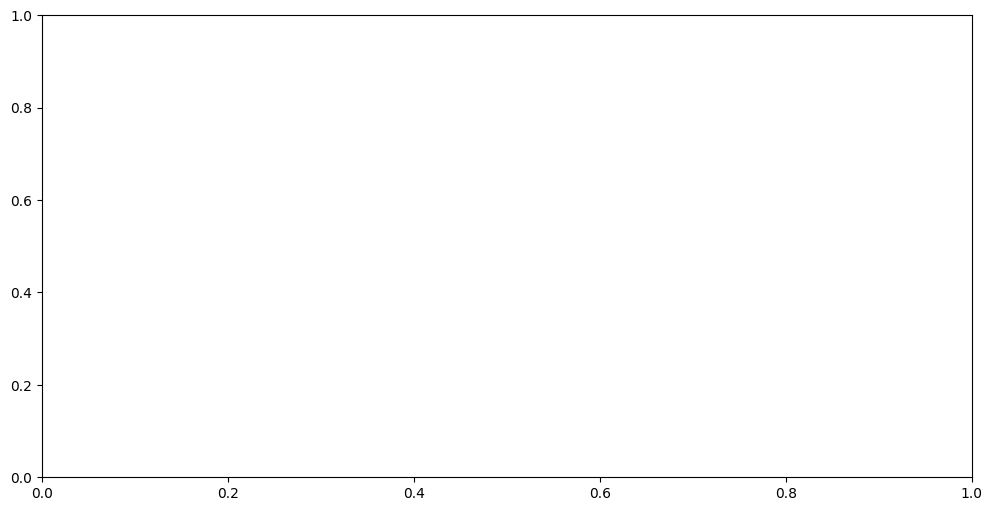

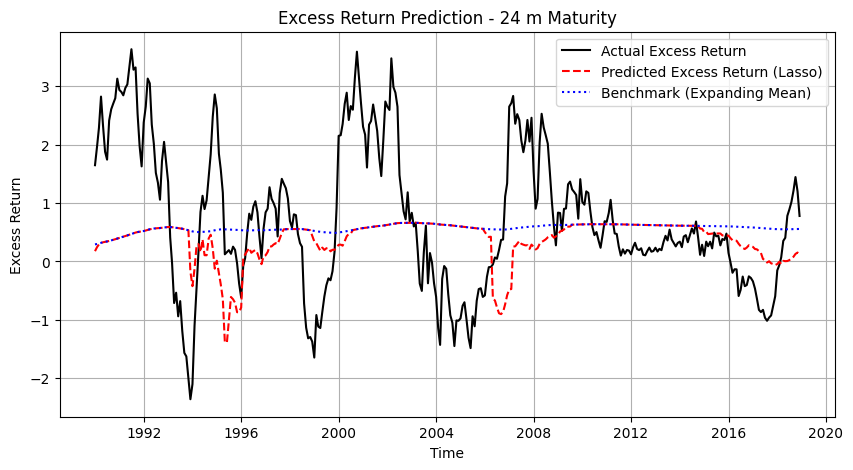

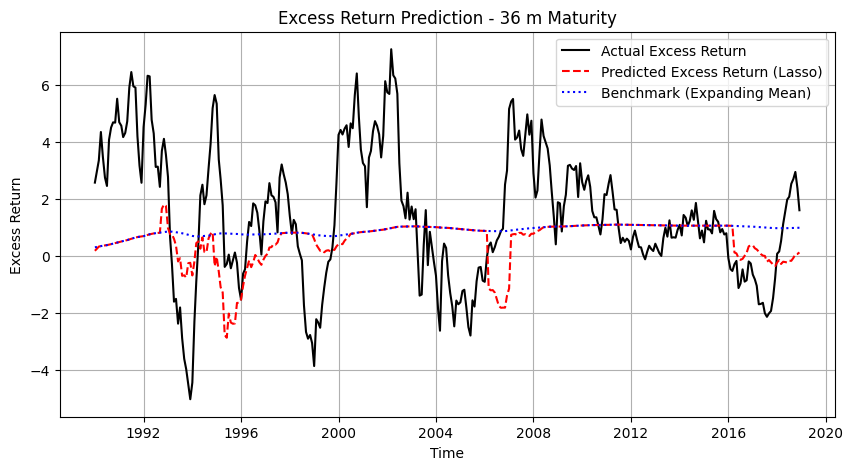

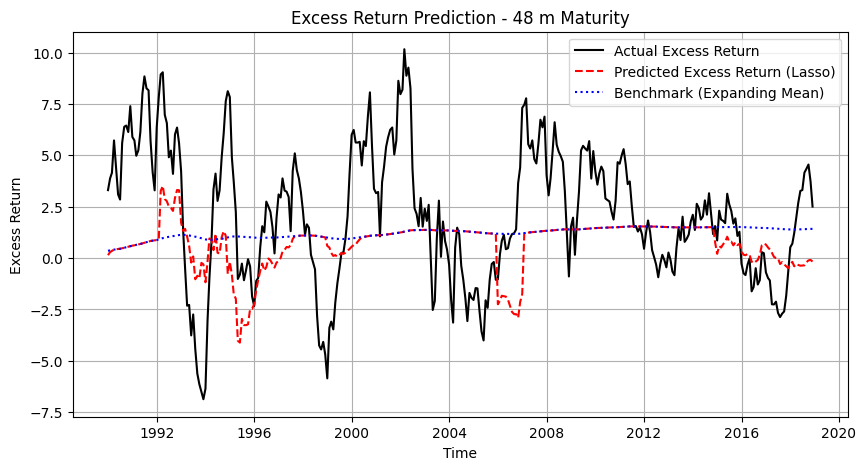

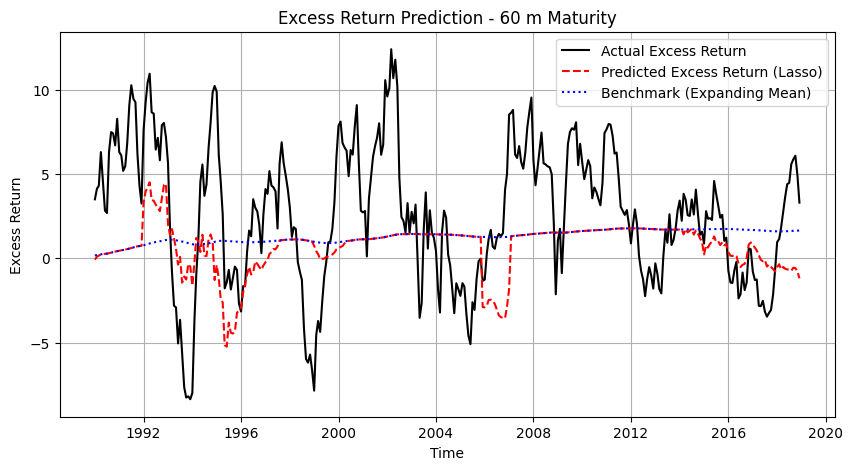

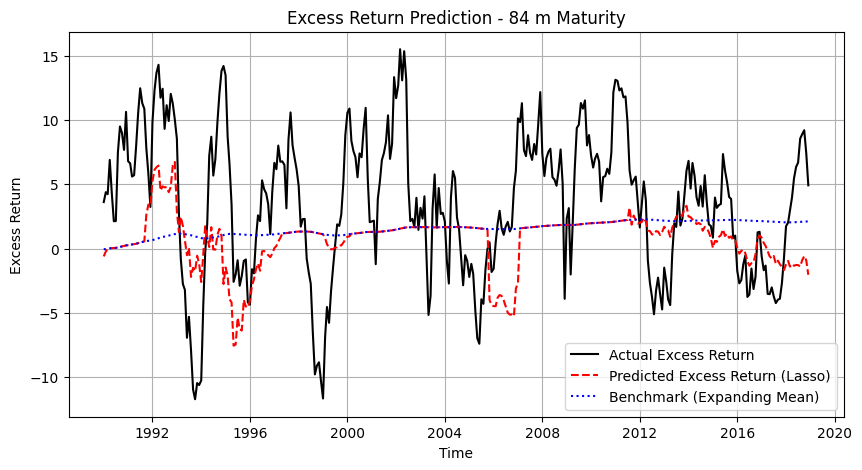

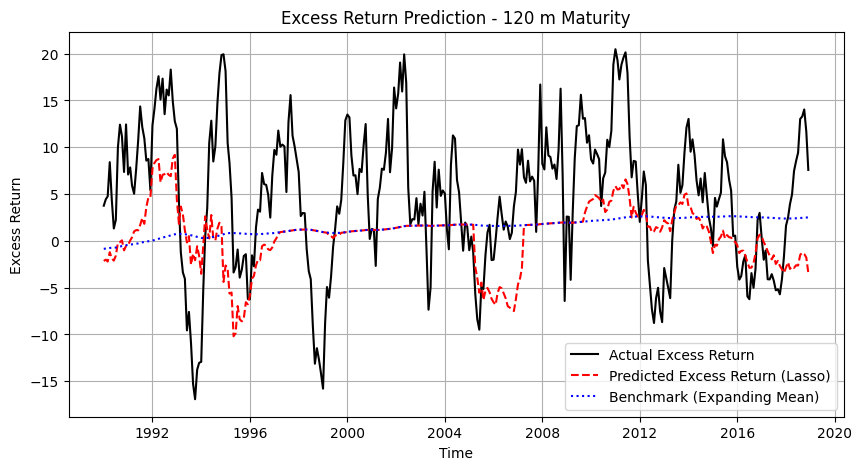

In [6]:
# === SETTINGS ===
EXCESS_RETURN_PATH = '/Users/Siebe.van.Wingerden/Desktop/Python Codes/xr2.xlsx'
FWD_RATE_PATH = '/Users/Siebe.van.Wingerden/Desktop/Python Codes/fwd2.xlsx'
OOS_START_DATE = "1990-01-01"
OOS_END_DATE = "2018-12-01"
FULL_START_DATE = "1971-08-01"

# === Load and align data ===
df_xr = pd.read_excel(EXCESS_RETURN_PATH, decimal=",")
df_fwd = pd.read_excel(FWD_RATE_PATH, decimal=",")

df_xr.columns = [c.strip().lower() for c in df_xr.columns]
df_fwd.columns = [c.strip().lower() for c in df_fwd.columns]

df_xr['date'] = pd.to_datetime(df_xr['date'])
df_fwd['date'] = pd.to_datetime(df_fwd['date'])

df = pd.merge(df_xr, df_fwd, on="date", suffixes=("_xr", "_fwd"))
df.set_index("date", inplace=True)

# === Define maturities and columns ===
regressor_maturities = ["12 m", "24 m", "36 m", "48 m", "60 m", "72 m", "84 m", "96 m", "108 m", "120 m"]
fwd_cols = [m + "_fwd" for m in regressor_maturities]

target_maturities = ["24 m", "36 m", "48 m", "60 m", "84 m", "120 m"]
target_cols = [m + "_xr" for m in target_maturities]

df = df[(df.index >= FULL_START_DATE) & (df.index <= OOS_END_DATE)].copy()

# === Prepare arrays ===
Y = df[target_cols].to_numpy()
Xexog = df[fwd_cols].to_numpy()
dates = df.index.to_numpy()

# === Expanding Window Forecast ===
n_obs = Y.shape[0]
n_maturities = Y.shape[1]expanding_mean_check = np.full_like(Y, np.nan, dtype=np.float64)
expanding_mean_check[0] = 0
for t in range(1, n_obs):
    expanding_mean_check[t, :] = Y[:t, :].mean(axis=0)

expanding_mean_df = pd.DataFrame(expanding_mean_check, columns=target_maturities, index=df.index)
expanding_mean_df = expanding_mean_df.iloc[221:]  

start_oos_idx = df.index.get_loc(pd.to_datetime(OOS_START_DATE))
y_preds = np.full_like(Y, np.nan)

def run_lasso(X_train, Y_train, X_test):
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test.reshape(1,-1))
    N_train = int(np.round(np.size(X_train_scaled,axis=0)*0.85))
    N_val = np.size(X_train_scaled,axis=0)-N_train
    test_fold =  np.concatenate(((np.full((N_train),-1),np.full((N_val),0))))
    ps = PredefinedSplit(test_fold.tolist())
    
    model = LassoCV(cv=ps)
    Y_pred = np.full((1, Y_train.shape[1]), np.nan)  

    for i in range(Y_train.shape[1]):  
        model.fit(X_train_scaled, Y_train[:, i])
        Y_pred[0, i] = model.predict(X_test_scaled)[0]  
    return Y_pred

# === Run Expanding Window Forecast #1 ===
print("Running Lasso with expanding window... \n")
for t in range(start_oos_idx, len(Y)):
    y_preds[t, :] = run_lasso(Xexog[:t, :], Y[:t, :], Xexog[t, :])
    print(f"Forecast {t+1 - start_oos_idx}/{len(Y) - start_oos_idx} ({df.index[t].strftime('%Y-%m')})")


# === Performance Evaluation #1===
print("\n=== Lasso Regression OOS Performance ===")
for i, col in enumerate(target_maturities):
    y_true = Y[start_oos_idx:, i]
    y_forecast = y_preds[start_oos_idx:, i]
    expanding_mean_for_maturity = expanding_mean_df[col].iloc[0:len(y_true)].values
    r2 = R2OOS(y_true, y_forecast, expanding_mean_for_maturity)
    rmse = np.sqrt(mean_squared_error(y_true, y_forecast))
    mae = mean_absolute_error(y_true, y_forecast)
    cw_stat, cw_p = clark_west_test(y_true, y_forecast, expanding_mean_for_maturity)

    print(f"{col}: R²OOS={r2:.4f}%, RMSE={rmse:.4f}, MAE={mae:.4f}, Clark and West stat={cw_stat:.2f}, p-value={cw_p:.4f}")

# === Plot Results ===
fig, ax = plt.subplots(figsize=(12, 6))

for i, col in enumerate(target_maturities):
    plt.figure(figsize=(10, 5))  # Create a new figure for each maturity
    y_true = Y[start_oos_idx:, i]
    y_forecast = y_preds[start_oos_idx:, i]
    expanding_mean_for_maturity = expanding_mean_df[col].iloc[0:len(y_true)].values
    plt.plot(df.index[start_oos_idx:], y_true, label="Actual Excess Return", color="black", linestyle="-")
    plt.plot(df.index[start_oos_idx:], y_forecast, label="Predicted Excess Return (Lasso)", color="red", linestyle="--")
    plt.plot(df.index[start_oos_idx:], expanding_mean_for_maturity, label="Benchmark (Expanding Mean)", color="blue", linestyle=":")
    plt.xlabel("Time")
    plt.ylabel("Excess Return")
    plt.title(f"Excess Return Prediction - {col} Maturity")
    plt.legend()
    plt.grid(True)
    plt.show()